In [1]:
##inporting libraries

In [2]:
import pandas as pd
import sklearn as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
##Loading Dataset and viewing it

In [4]:
df = pd.read_csv('mcdonalds.csv')

In [6]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [7]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [9]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [10]:
##Checking for null entries in each columns

In [11]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [12]:
##Creating data frame

In [13]:
df1 = pd.DataFrame()
df1 = df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']].apply(pd.Series.value_counts)
df1 = df1.T
df1

,No,Yes
yummy,650,803
convenient,134,1319
spicy,1317,136
fattening,193,1260
greasy,688,765
fast,145,1308
cheap,583,870
tasty,517,936
expensive,933,520
healthy,1164,289


In [15]:
##Changing yes no to 0 and 1 format

In [16]:
def Cat(x):
  if(x=='Yes'):
    return 1
  else:
    return 0

In [17]:
k = {'yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting'}
for i in k:
  df[i] = df[i].apply(Cat)

In [18]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


<Axes: xlabel='Age', ylabel='Percent'>

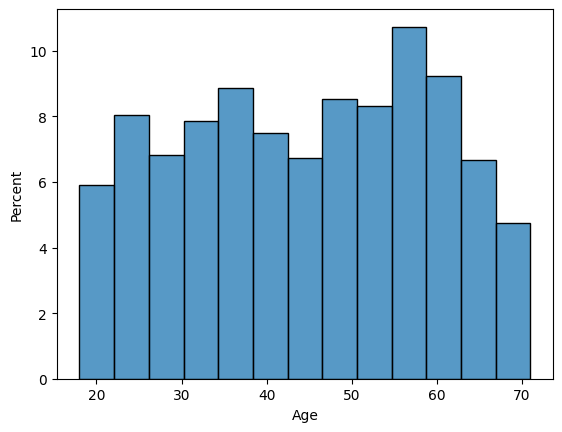

In [19]:
sns.histplot(x=df['Age'], stat='percent')

<Axes: xlabel='Age', ylabel='Density'>

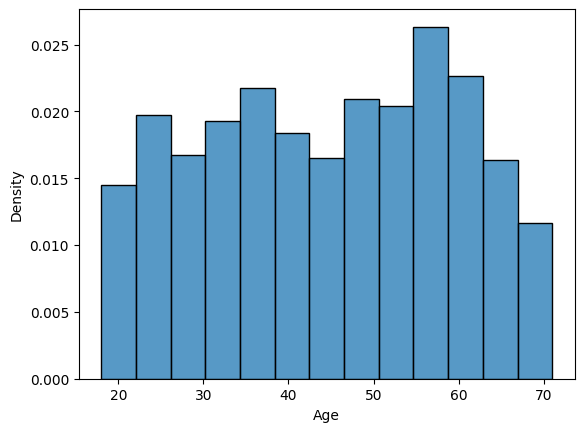

In [20]:
sns.histplot(x=df['Age'], stat='density')

In [21]:
df['Age'].describe()

count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
25%        33.000000
50%        45.000000
75%        57.000000
max        71.000000
Name: Age, dtype: float64

<Axes: xlabel='Age'>

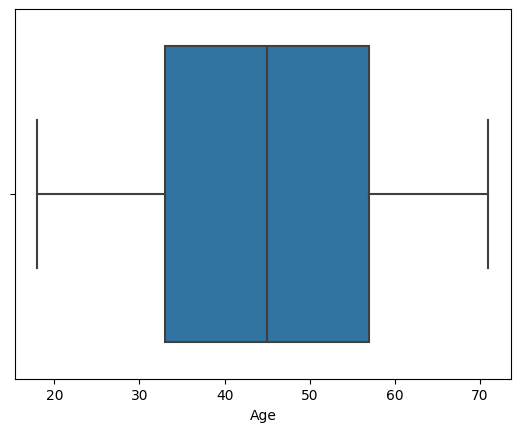

In [22]:
sns.boxplot(x=df['Age'])

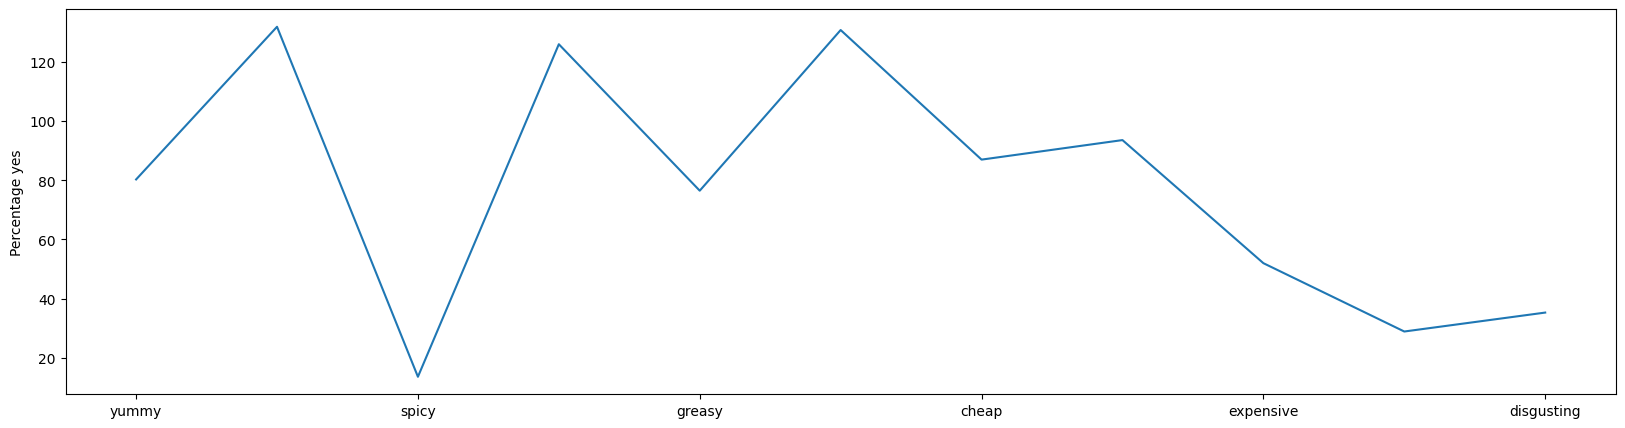

In [23]:
x = df1['Yes']*100/1000
plt.figure(figsize = (20,5))
x.plot()
plt.ylabel('Percentage yes')
plt.show()

In [24]:
df2 = df.iloc[:,0:11]
df2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = sc.fit_transform(df2)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
pca.fit(sc_df)
X_pca = pca.transform(sc_df)

In [27]:
X_pca.shape

(1453, 11)

In [28]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11"])

In [29]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


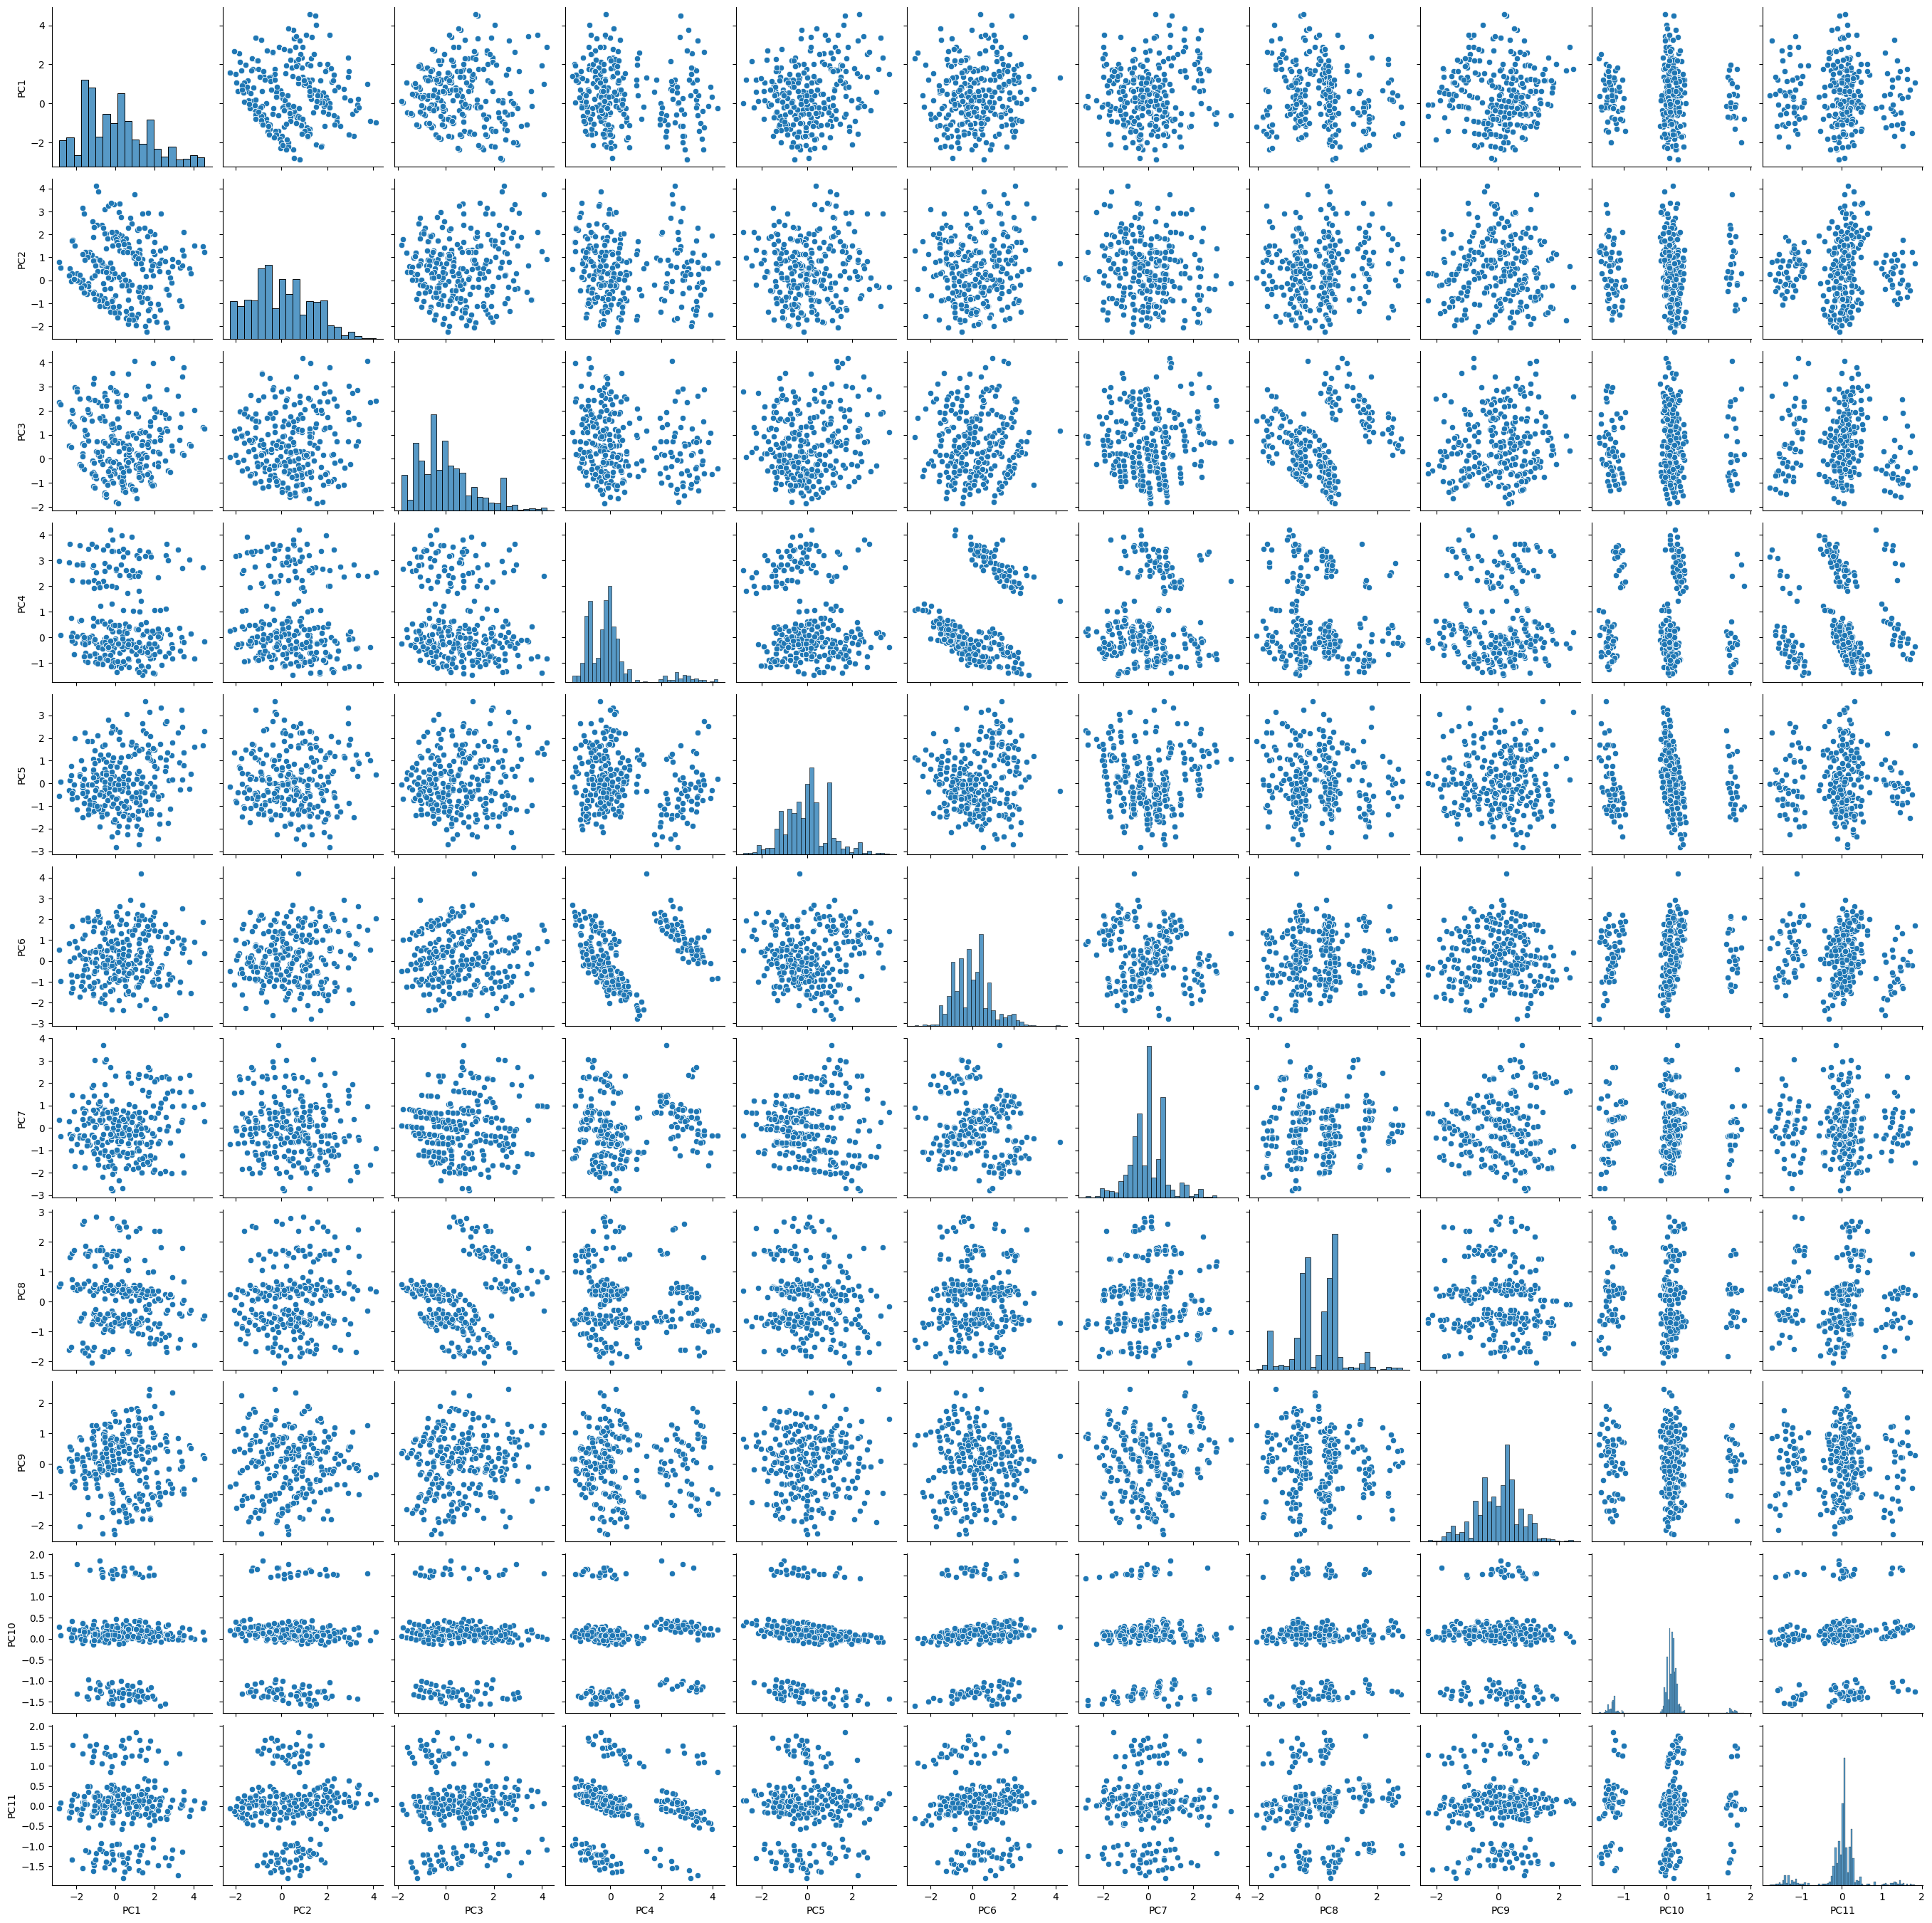

In [30]:
sns.pairplot(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

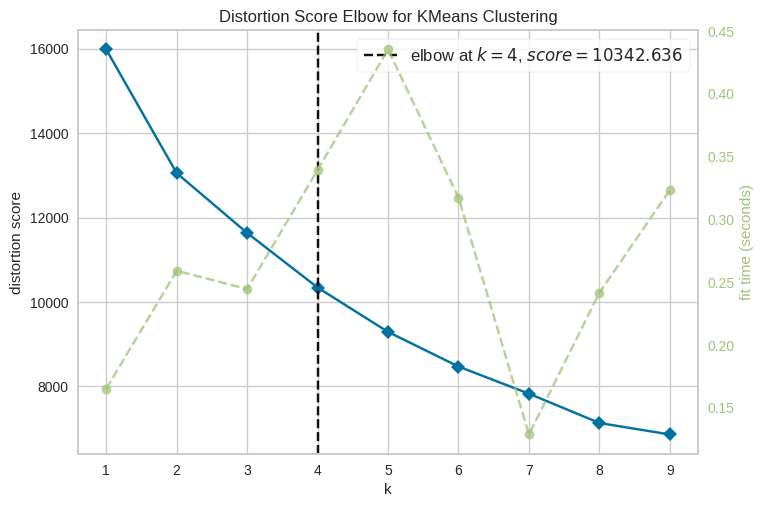

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans_model = KMeans()
visualizer = KElbowVisualizer(kmeans_model, k=(1,10))
visualizer.fit(sc_df)
visualizer.show()

In [32]:
kmeans = KMeans(4)
kmeans.fit_predict(sc_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


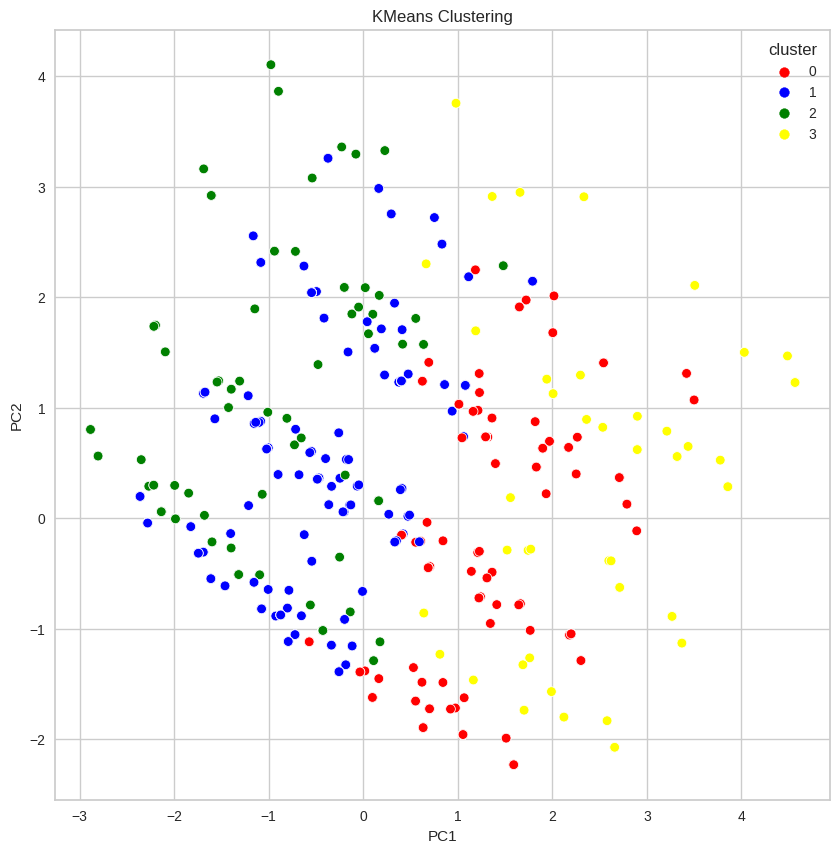

In [33]:
plt.figure(figsize=(10,10))
dia = sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_df_kmeans, palette=['red', 'blue', 'green', 'yellow'])
plt.title("KMeans Clustering")
plt.show()

In [34]:
kmeans = KMeans(4)
kmeans.fit_predict(sc_df)
pca_df_kmeans1 = pd.concat([df2,pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='cluster', ylabel='count'>

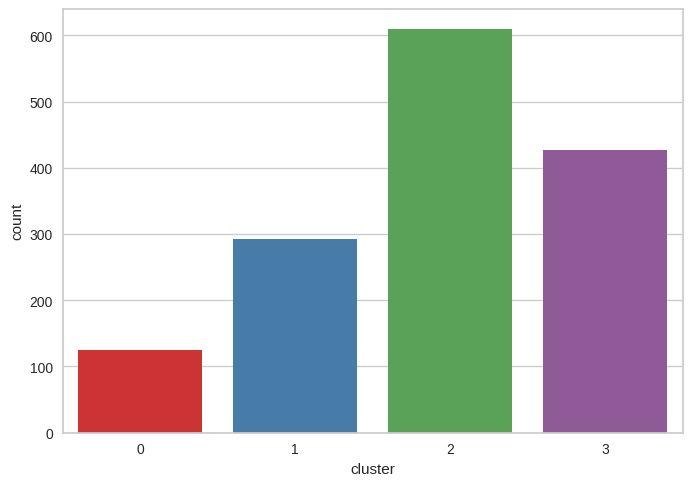

In [35]:
sns.countplot(x ='cluster', data = pca_df_kmeans1, palette = "Set1")


In [36]:
cluster1 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster2 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster3 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster4 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]

<ipython-input-37-3076cab0ab1a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


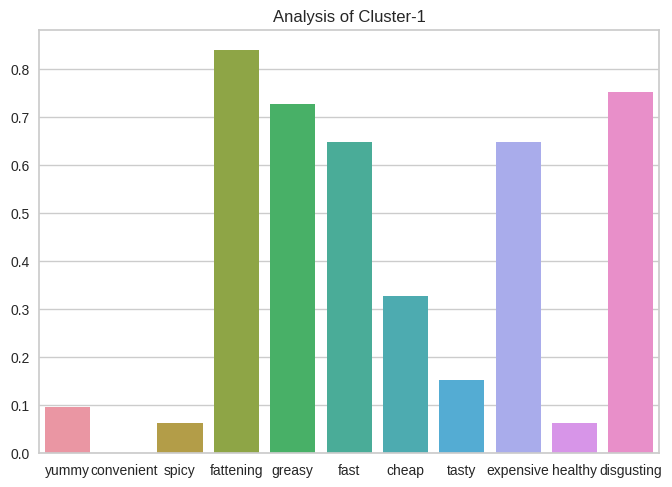

In [37]:
dia = sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-1')
plt.show()

<ipython-input-38-31ea89d3a712>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster2[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


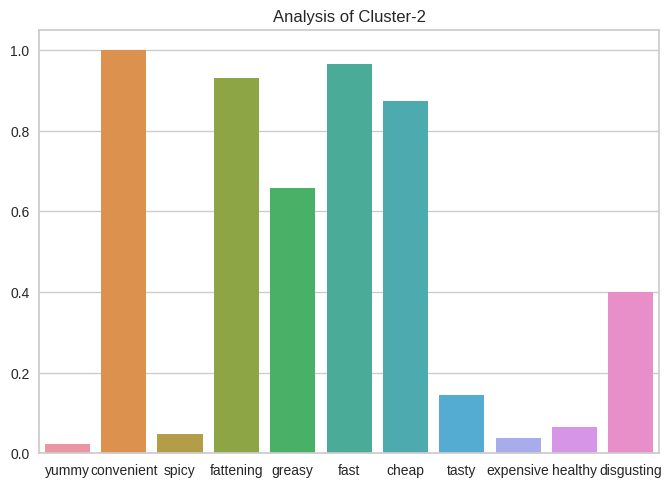

In [38]:
dia = sns.barplot(data=cluster2[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-2')
plt.show()

<ipython-input-39-a86a0d0a6a79>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster3[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


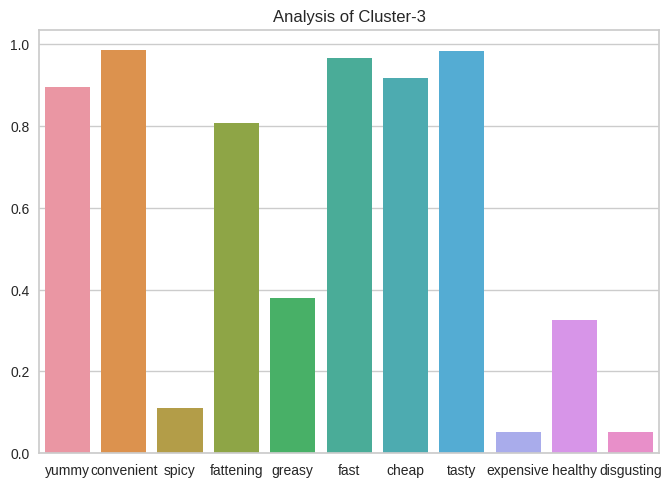

In [39]:
dia = sns.barplot(data=cluster3[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-3')
plt.show()

<ipython-input-40-65a37d6f3c92>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  dia = sns.barplot(data=cluster4[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)


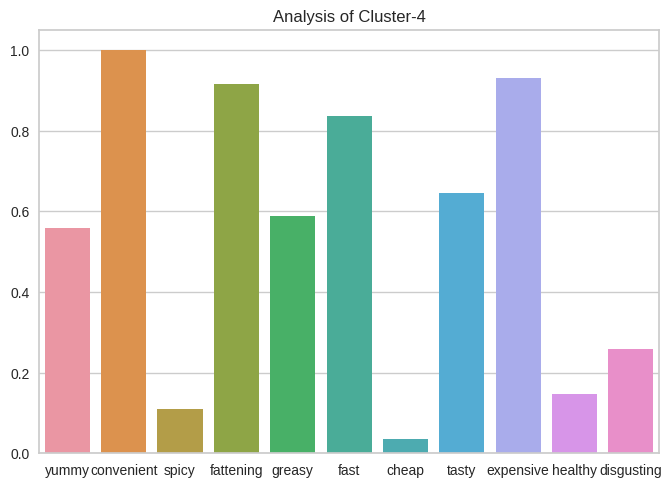

In [40]:
dia = sns.barplot(data=cluster4[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-4')
plt.show()

In [41]:
##Combining our main datasetwith cluster data

In [42]:
df_new= pd.concat([df,pd.DataFrame({'cluster':kmeans.labels_})],axis=1)
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,2
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,1


In [43]:
df_new['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [74]:
df_new["VisitFrequency"]= df_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'More than once a week':5})

In [75]:
df_new["Like"]= df_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})

In [76]:
df_new["Gender"]= df_new["Gender"].replace({'Female':0, 'Male':1})

In [77]:
#Viewing modified dataset

In [78]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,1
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,2
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,3
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,2
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,1


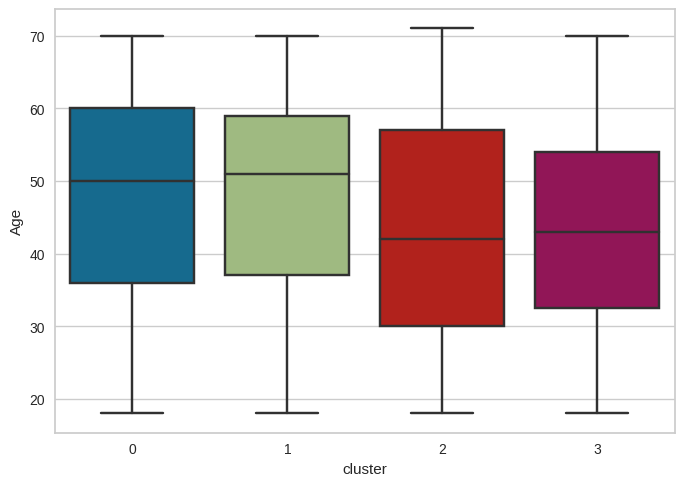

In [79]:
sns.boxplot(x=df_new['cluster'], y=df_new['Age'])
plt.show()


In [80]:
from sklearn.model_selection import train_test_split
X = df_new.drop(['cluster'],axis=1)
Y = df_new[['cluster']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [81]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
model = classifier.fit(X, Y)

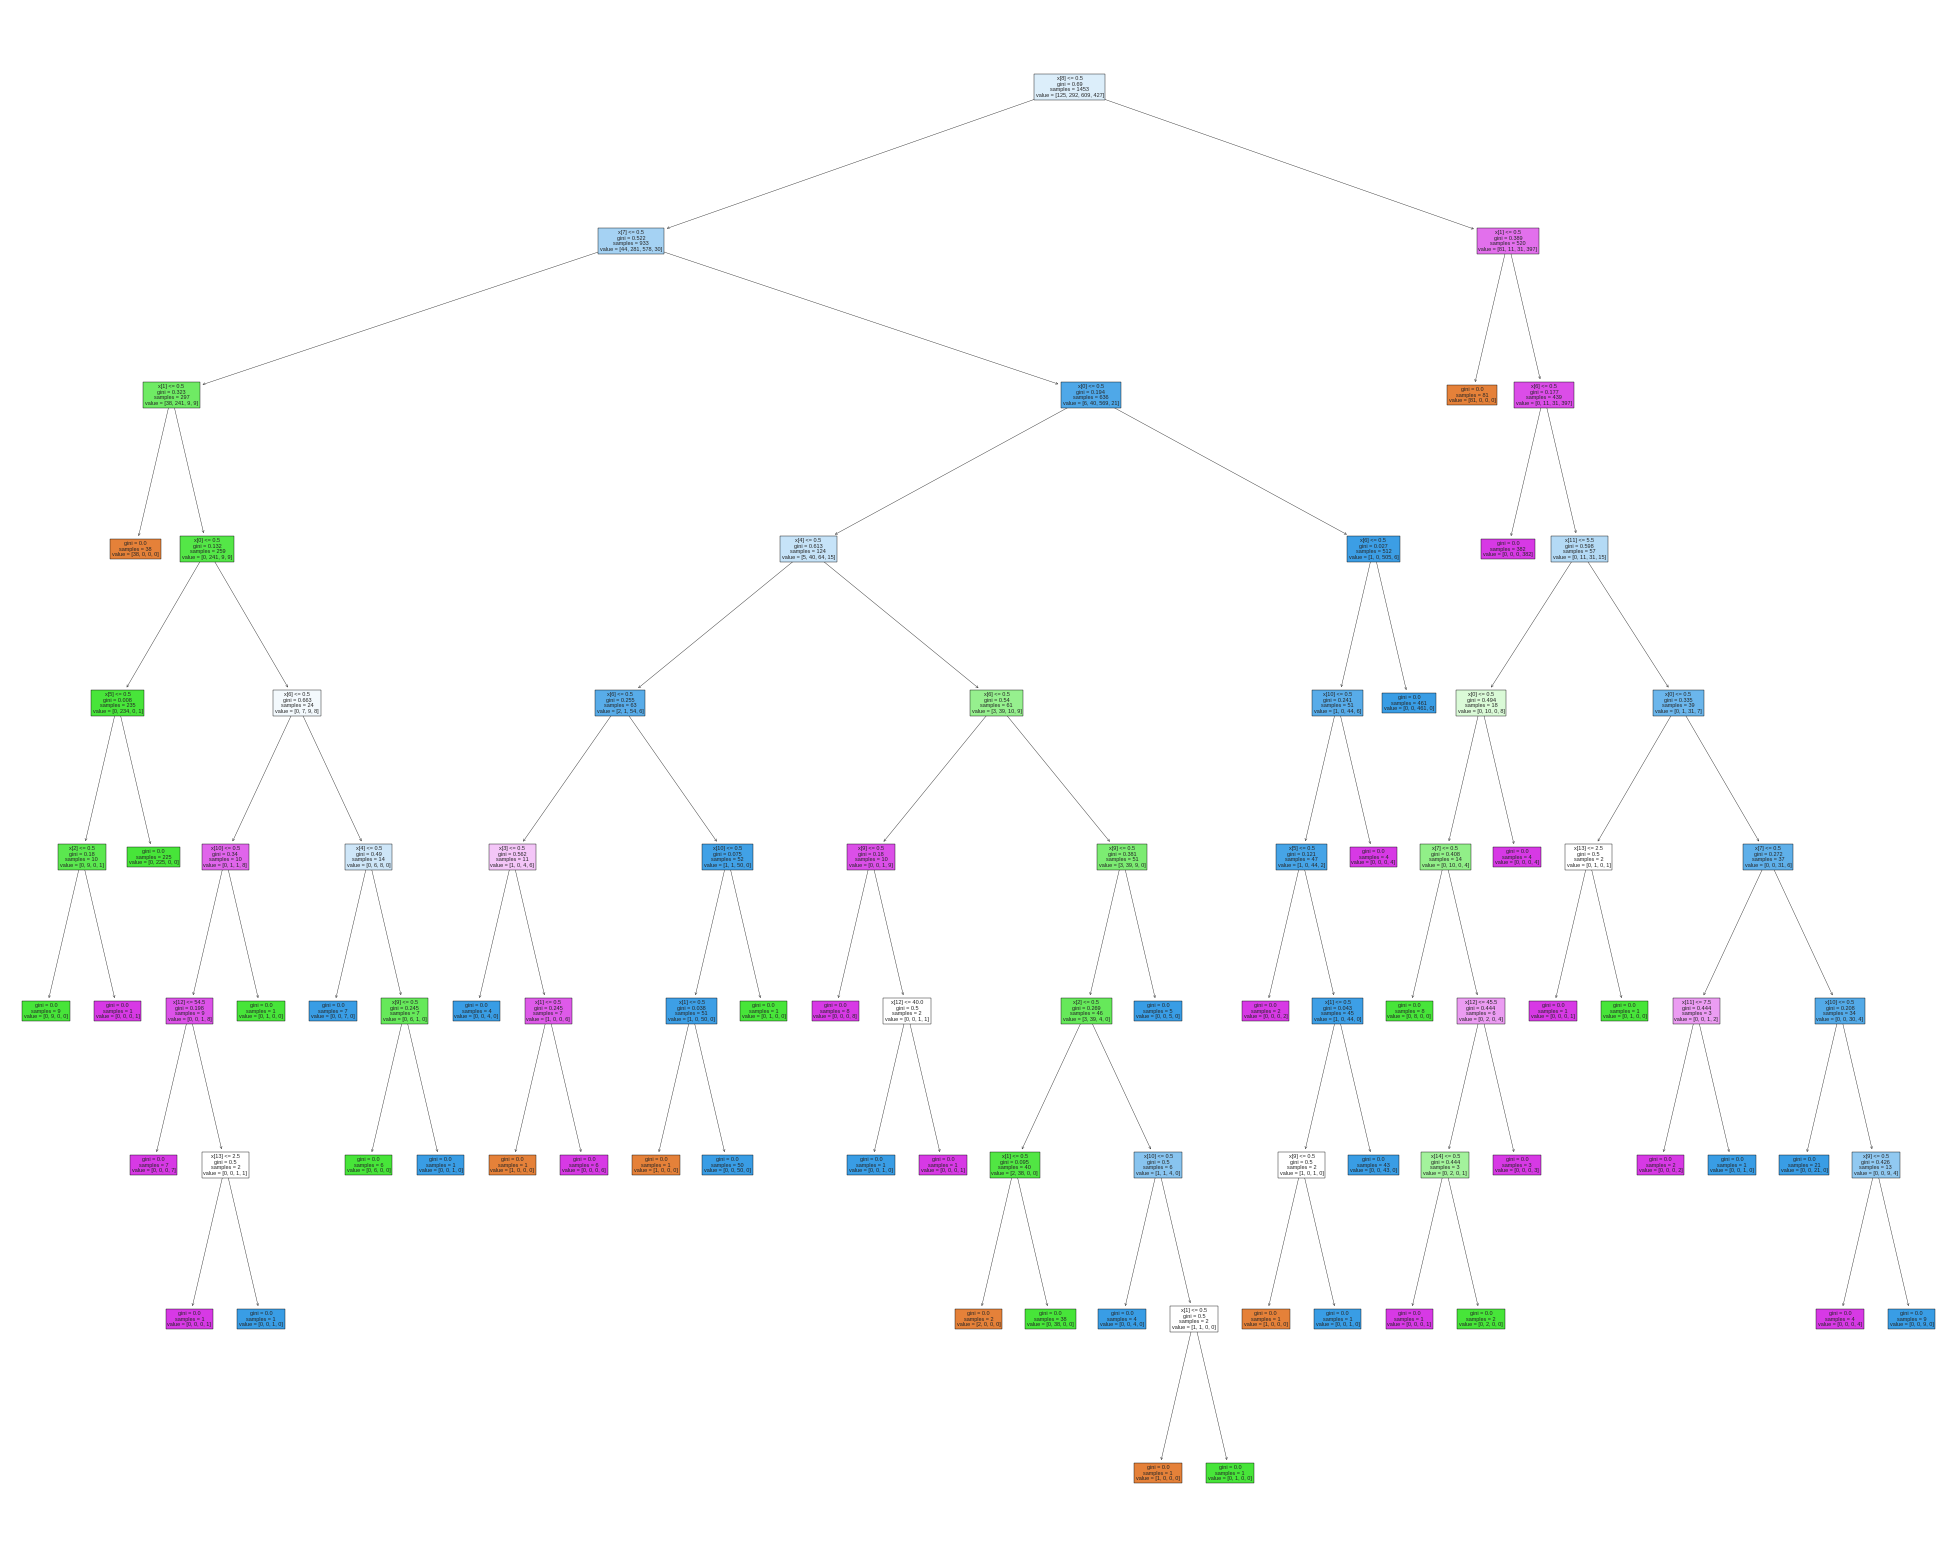

In [82]:
from sklearn import tree
dia = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, filled=True)

In [83]:
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [84]:
##Calculating Accuracy

In [85]:
import pickle
filename = 'classifier.pkl'
pickle.dump(classifier, open(filename, 'wb'))

#again loading the stored model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result*100,'% Accuracy')

99.3127147766323 % Accuracy


Original file is located at
    https://colab.research.google.com/drive/1Qa5K_9A4o_TlkH2NSnwqm4TGritOvAme